In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import operator
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import nltk
nltk.download("stopwords")
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/srikarmurali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [160]:
rating = pd.read_csv("/Users/srikarmurali/Documents/Anime Analysis/rating.csv")
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [3]:
anime = pd.read_csv("/Users/srikarmurali/Documents/Anime Analysis/anime.csv")
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
data = pd.merge(anime, rating,  on= 'anime_id', how='outer')
data.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0,278.0,-1.0


In [5]:
data.shape

(7814834, 9)

In [6]:
anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

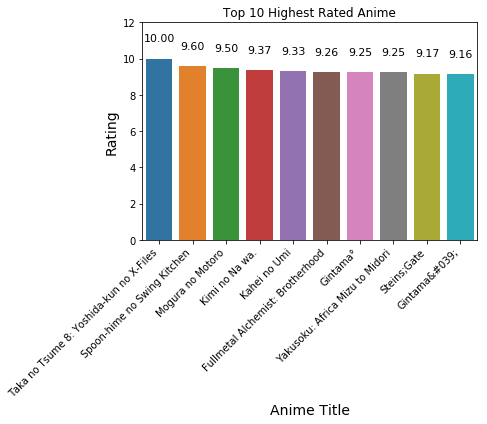

In [7]:
sorted_anime = anime.sort_values(by="rating", axis=0, ascending=False)
top_10_anime = sorted_anime.iloc[:10, :]
g = sns.barplot(x="name", y = "rating", data = top_10_anime)
g.set_title("Top 10 Highest Rated Anime")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha = "right")
g.set_xlabel("Anime Title",fontsize=14)
g.set_ylabel("Rating",fontsize=14)
g.set_ylim(0, 12)
for p in g.patches:
             g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')


Text(0, 0.5, 'Count of Shows')

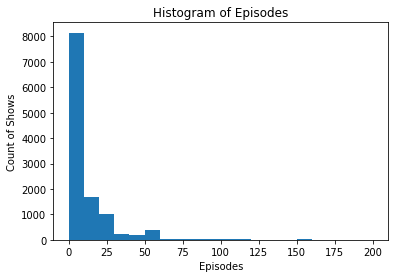

In [8]:
episodes = anime.loc[anime["episodes"] != "Unknown"]["episodes"]
episodes = pd.to_numeric(episodes)
plt.hist(episodes, bins = 20, range = (0, 200))

plt.title("Histogram of Episodes")
plt.xlabel("Episodes")
plt.ylabel("Count of Shows")

In [9]:
anime["type"].fillna("Mixed", inplace=True)

members = anime.sort_values(by="members", ascending=False)
types = list(members["type"].unique())


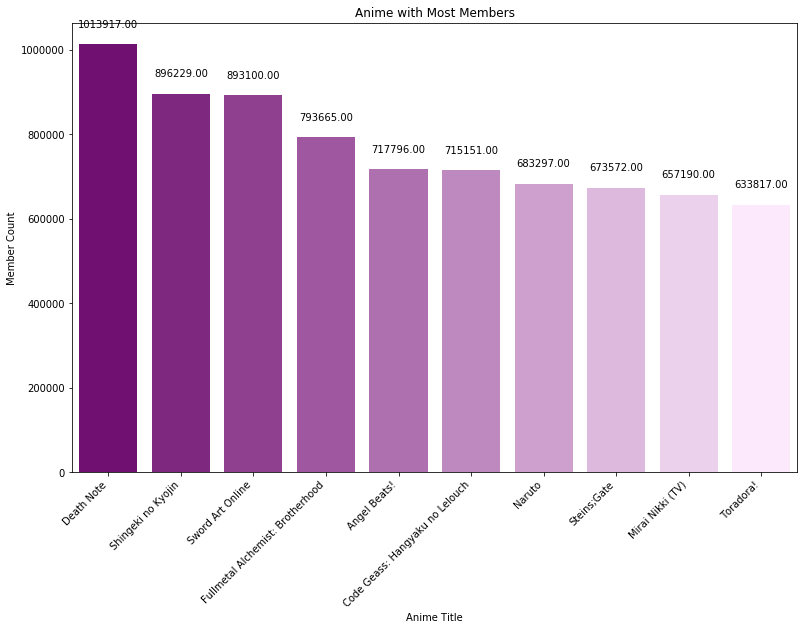

In [10]:
a4_dims = (13, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.barplot(ax = ax, data = members[:10], x = "name", y = "members", palette = sns.light_palette(color = "purple", n_colors=10, reverse=True))
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha = "right")
g.set_title("Anime with Most Members")
g.set_xlabel("Anime Title")
g.set_ylabel("Member Count")

for p in g.patches:
             g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 20),
                 textcoords='offset points')


(-0.5, 1439.5, 1079.5, -0.5)

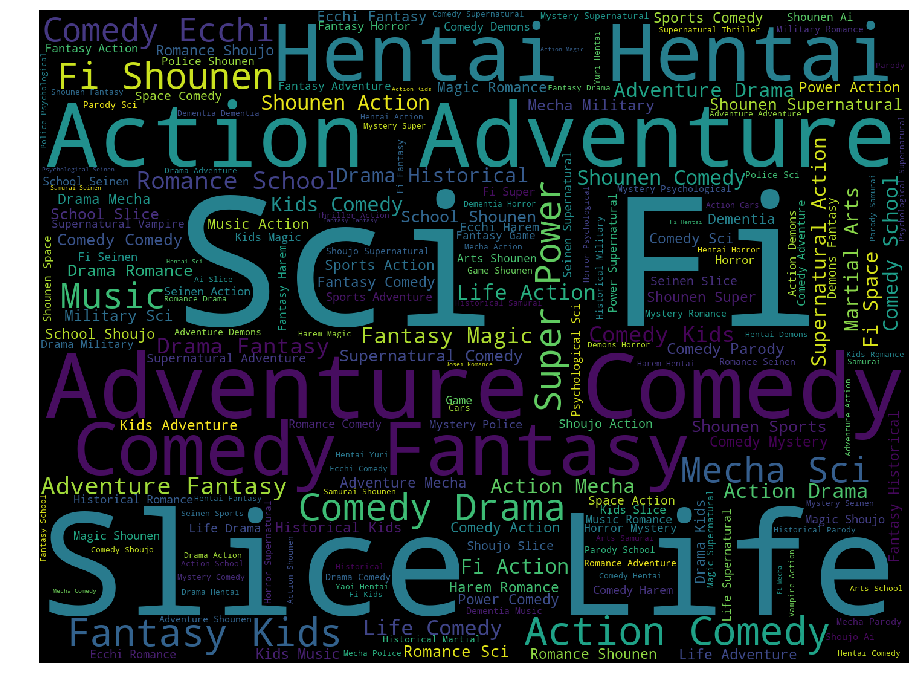

In [11]:
stopwords = stopwords.words('english')

cloud = WordCloud(width=1440, height=1080, stopwords=stopwords).generate(" ".join(anime['genre'].dropna().astype(str)))
plt.figure(figsize=(20, 12))
plt.imshow(cloud)
plt.axis('off')

Text(0, 0.5, 'Rating')

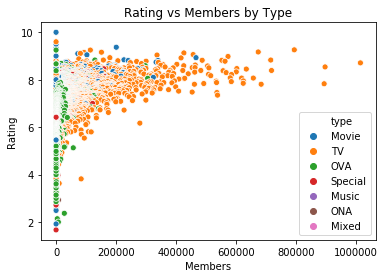

In [12]:
#amime["episodes"] = pd.to_numeric(anime["episodes"])
g = sns.scatterplot(data = anime, x = "members", y = "rating", hue="type")
g.set_title("Rating vs Members by Type")
g.set_xlabel("Members")
g.set_ylabel("Rating")


[Text(0, 0, 'anime_id'),
 Text(0, 0, 'name'),
 Text(0, 0, 'genre'),
 Text(0, 0, 'type'),
 Text(0, 0, 'episodes'),
 Text(0, 0, 'rating'),
 Text(0, 0, 'members')]

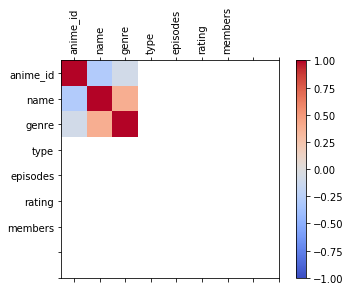

In [13]:
corr = anime.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(anime.columns)
ax.set_yticklabels(anime.columns)


Text(0.5, 1.0, 'Distribution of Anime Type')

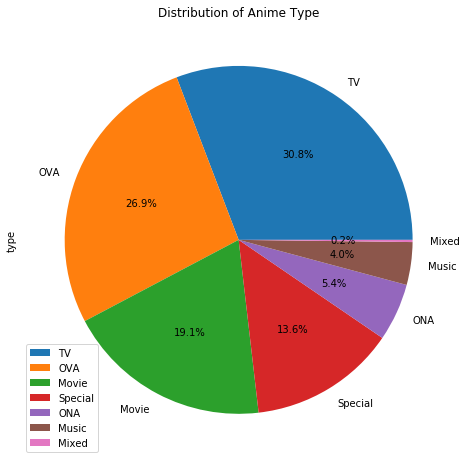

In [14]:
types = pd.DataFrame(anime["type"].value_counts(normalize=True)*100)
types.plot.pie(y="type", figsize=(8, 8), autopct="%1.1f%%")
plt.legend(loc="lower left")
plt.title("Distribution of Anime Type")




In [15]:
a2 = anime
genre = a2["genre"].str.split(",").apply(pd.Series, 1).stack()
genre.index = genre.index.droplevel(-1) # to line up with df's index
genre.name = "genre" #assign name to join
del a2["genre"]
a2 = a2.join(genre)
a2.head()


,anime_id,name,type,episodes,rating,members,genre
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,Drama
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,Romance
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,School
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,Supernatural
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,Action


(-0.5, 1439.5, 1079.5, -0.5)

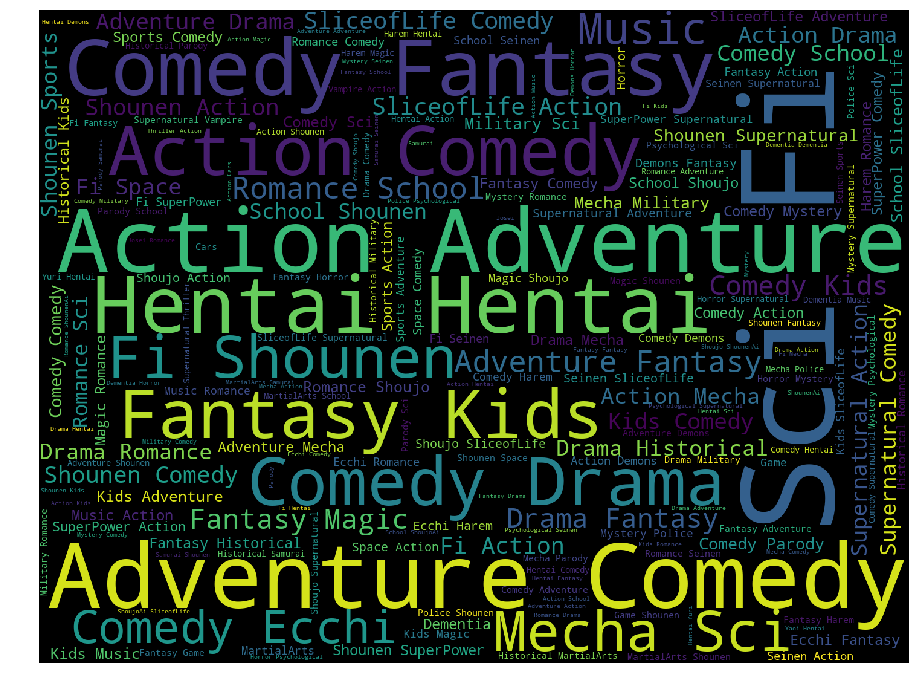

In [16]:
a2["genre"] = a2["genre"].str.replace(' ', '')
genre_rating = a2.groupby("genre", as_index=False)["rating"].mean()
genre_rating = genre_rating.sort_values(by="rating",  ascending = False)
#stopwords = stopwords.words('english')

cloud = WordCloud(width=1440, height=1080, stopwords=stopwords).generate(" ".join(a2['genre'].dropna().astype(str)))
plt.figure(figsize=(20, 12))
plt.imshow(cloud)
plt.axis('off')

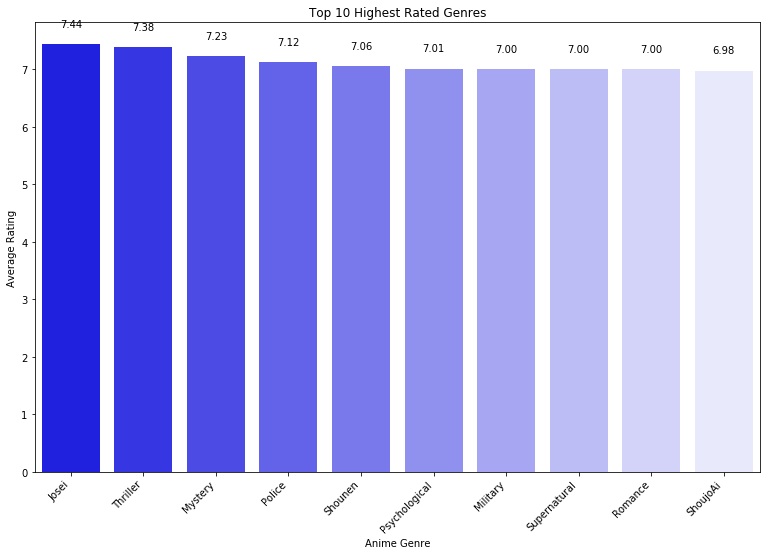

In [17]:
a4_dims = (13, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.barplot(ax = ax, data=genre_rating[:10], x="genre", y = "rating", palette=sns.light_palette(n_colors=10, color = "Blue", reverse=True))
g.set_title("Top 10 Highest Rated Genres")
g.set_xlabel("Anime Genre")
g.set_ylabel("Average Rating")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha = "right")
for p in g.patches:
             g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 20),
                 textcoords='offset points')


In [18]:
genre_member = a2.groupby("genre", as_index = False)["members"].sum()
genre_member.sort_values(by="members", ascending=False, inplace=True)
genre_member.head()

,genre,members
3,Comedy,107001258
0,Action,95508123
25,Romance,65663654
6,Drama,58262597
8,Fantasy,57260631


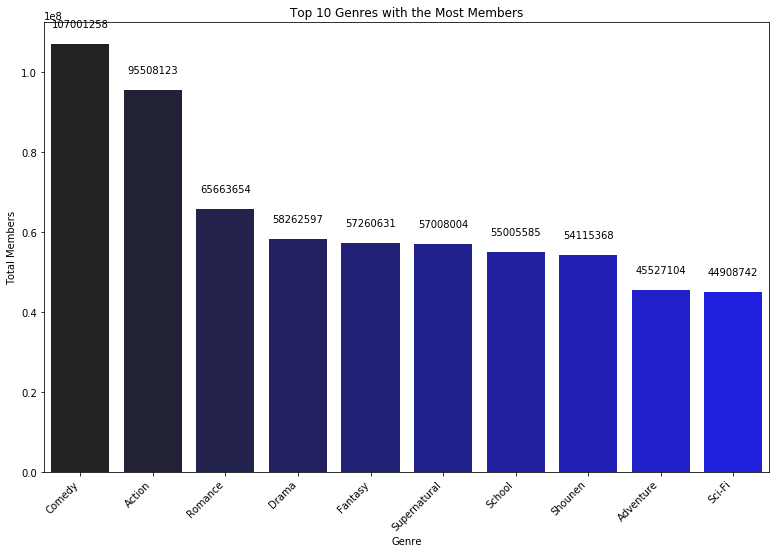

In [19]:
a4_dims = (13, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.barplot(ax = ax, data=genre_member[:10], x = "genre", y = "members", palette = sns.dark_palette(n_colors=10, color="Blue"))
g.set_title("Top 10 Genres with the Most Members")
g.set_xlabel("Genre")
g.set_ylabel("Total Members")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha = "right")
for p in g.patches:
             g.annotate("%0.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 20),
                 textcoords='offset points')


Text(0.5, 1.0, 'Distribution of Top 10 Anime Genre')

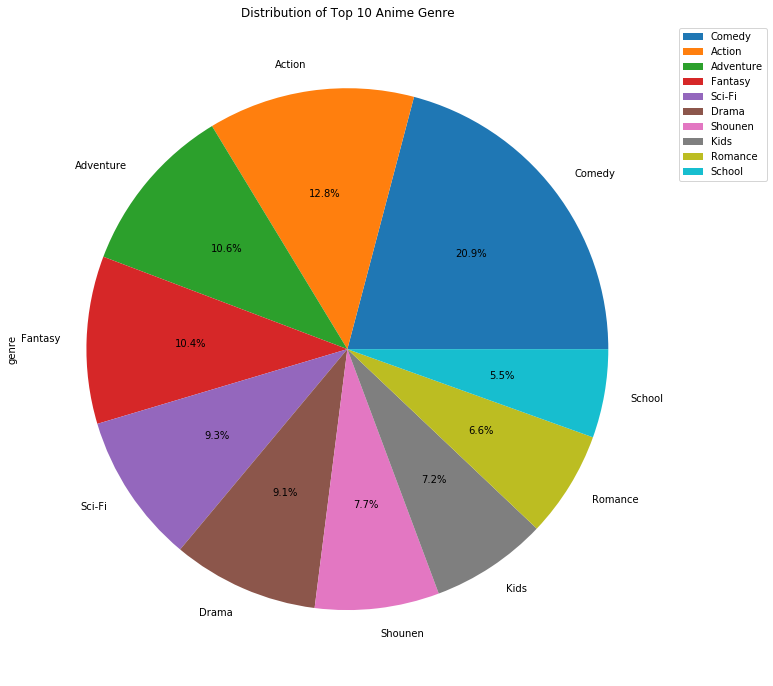

In [20]:
genre_distribution = pd.DataFrame(a2["genre"].value_counts(normalize=True)*100)
genre_distribution.sort_values(by="genre", ascending=False, inplace=True)
genre_distribution[:10].plot.pie(y="genre", figsize=(12,12), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Distribution of Top 10 Anime Genre")




In [21]:
data["rating_y"] = data["rating_y"].astype(str)
data["rating_y"].replace('-1.0', '0', inplace=True)
data["rating_y"] = data["rating_y"].astype(float)

data.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630.0,278.0,0.0


In [33]:
anime_user_ratings = data[["user_id", "name", "rating_y"]]
anime_user_ratings = anime_user_ratings[anime_user_ratings["user_id"] <= 100]


In [46]:
anime_user_ratings.shape

(1181, 100)

In [34]:
anime_user_ratings = anime_user_ratings.pivot_table(index=["user_id"], columns=["name"], values="rating_y", fill_value=0)
anime_user_ratings.head()

name,&quot;Bungaku Shoujo&quot; Movie,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//The Movie: Sekai no Mukou ni,07-Ghost,11eyes,11eyes: Momoiro Genmutan,30-sai no Hoken Taiiku,91 Days,...,ef: A Tale of Melodies.,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,gdgd Fairies,gdgd Fairies 2,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [35]:
#anime_user_ratings = scale(anime_user_ratings.values)

In [36]:
anime_user_ratings = anime_user_ratings.apply(lambda x: (x-np.mean(x))/(np.max(x) - np.min(x)), axis=1)

In [37]:
anime_user_ratings.fillna(0, inplace=True)
anime_user_ratings = anime_user_ratings.T
anime_user_ratings.head()

user_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Movie,-0.001801,-0.00045,-0.031337,0.0,-0.090005,0.0,-0.114093,-0.004502,-0.00045,-0.001261,...,-0.002251,-0.001261,-0.047636,-0.015308,-0.037551,-0.004187,-0.014498,-0.041108,-0.033543,-0.002206
.hack//Roots,-0.001801,-0.00045,-0.031337,0.0,-0.090005,0.0,-0.114093,-0.004502,-0.00045,-0.001261,...,-0.002251,-0.001261,-0.047636,-0.015308,-0.037551,-0.004187,-0.014498,-0.041108,-0.033543,-0.002206
.hack//Sign,-0.001801,-0.00045,-0.031337,0.0,-0.090005,0.0,-0.114093,-0.004502,-0.00045,-0.001261,...,-0.002251,-0.001261,-0.047636,-0.015308,-0.037551,-0.004187,-0.014498,-0.041108,-0.033543,-0.002206
.hack//Tasogare no Udewa Densetsu,-0.001801,-0.00045,-0.031337,0.0,-0.090005,0.0,-0.114093,-0.004502,-0.00045,-0.001261,...,-0.002251,-0.001261,-0.047636,-0.015308,-0.037551,-0.004187,-0.014498,-0.041108,-0.033543,-0.002206
.hack//The Movie: Sekai no Mukou ni,-0.001801,-0.00045,-0.031337,0.0,-0.090005,0.0,-0.114093,-0.004502,-0.00045,-0.001261,...,-0.002251,-0.001261,-0.047636,-0.015308,-0.037551,-0.004187,-0.014498,-0.041108,-0.033543,-0.002206


In [38]:

#anime_user_ratings = anime_user_ratings.loc[:, (anime_user_ratings != 0).any(axis=0)]
anime_user_ratings.drop_duplicates(inplace=True)
anime_user_ratings.head()

user_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Movie,-0.001801,-0.00045,-0.031337,0.0,-0.090005,0.0,-0.114093,-0.004502,-0.00045,-0.001261,...,-0.002251,-0.001261,-0.047636,-0.015308,-0.037551,-0.004187,-0.014498,-0.041108,-0.033543,-0.002206
.hack//Roots,-0.001801,-0.00045,-0.031337,0.0,-0.090005,0.0,-0.114093,-0.004502,-0.00045,-0.001261,...,-0.002251,-0.001261,-0.047636,-0.015308,-0.037551,-0.004187,-0.014498,-0.041108,-0.033543,-0.002206
.hack//Sign,-0.001801,-0.00045,-0.031337,0.0,-0.090005,0.0,-0.114093,-0.004502,-0.00045,-0.001261,...,-0.002251,-0.001261,-0.047636,-0.015308,-0.037551,-0.004187,-0.014498,-0.041108,-0.033543,-0.002206
.hack//Tasogare no Udewa Densetsu,-0.001801,-0.00045,-0.031337,0.0,-0.090005,0.0,-0.114093,-0.004502,-0.00045,-0.001261,...,-0.002251,-0.001261,-0.047636,-0.015308,-0.037551,-0.004187,-0.014498,-0.041108,-0.033543,-0.002206
.hack//The Movie: Sekai no Mukou ni,-0.001801,-0.00045,-0.031337,0.0,-0.090005,0.0,-0.114093,-0.004502,-0.00045,-0.001261,...,-0.002251,-0.001261,-0.047636,-0.015308,-0.037551,-0.004187,-0.014498,-0.041108,-0.033543,-0.002206


In [39]:
anime_user_ratings_sparse = sp.sparse.csr_matrix(anime_user_ratings.values)


In [40]:

item_sim = pd.DataFrame(cosine_similarity(
    anime_user_ratings_sparse),
    index=anime_user_ratings.index,
    columns=anime_user_ratings.index)

user_sim = pd.DataFrame(cosine_similarity(
    anime_user_ratings_sparse.T),
    index=anime_user_ratings.columns,
    columns=anime_user_ratings.columns
    )
#item = cosine_similarity(anime_user_ratings_sparse)


In [41]:

#similarity = pd.DataFrame(user, index = user.columns, columns = user.columns)
#similarity.head()

#item_sim = pd.DataFrame(item, index=anime_user_ratings.index, columns=anime_user_ratings.index)
item_sim.head()

name,&quot;Bungaku Shoujo&quot; Movie,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//The Movie: Sekai no Mukou ni,07-Ghost,11eyes,11eyes: Momoiro Genmutan,91 Days,Absolute Duo,...,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo,Zetsuen no Tempest,Zettai Karen Children: The Unlimited - Hyoubu Kyousuke,Zoku Natsume Yuujinchou,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,xxxHOLiC
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Movie,1.000000,0.255441,0.020596,0.072592,-0.056809,-0.090896,-0.103852,0.034762,-0.218317,-0.110021,...,0.294196,0.313485,0.128156,-0.152431,-0.093524,-0.025507,0.018265,0.116689,-0.057561,-0.054217
.hack//Roots,0.255441,1.000000,0.134679,0.325803,-0.027197,-0.179922,-0.211609,0.183392,-0.503308,-0.172049,...,-0.140156,-0.048249,-0.274208,-0.334602,-0.190499,0.015822,0.132407,0.473900,-0.075777,-0.072098
.hack//Sign,0.020596,0.134679,1.000000,0.639802,-0.048037,0.346286,-0.072817,0.013945,-0.147659,-0.081972,...,-0.053076,-0.032853,0.162196,-0.104654,0.153018,-0.024166,0.003988,0.059940,-0.044205,-0.041571
.hack//Tasogare no Udewa Densetsu,0.072592,0.325803,0.639802,1.000000,-0.043031,-0.089414,-0.103070,0.051469,-0.225486,-0.101333,...,-0.071999,-0.036014,-0.124071,-0.154901,-0.092809,-0.015095,0.032478,0.151407,-0.050870,-0.048024
.hack//The Movie: Sekai no Mukou ni,-0.056809,-0.027197,-0.048037,-0.043031,1.000000,0.310080,0.021162,-0.043824,0.332883,-0.207670,...,-0.119698,-0.093864,0.215713,0.424690,0.388291,0.455082,-0.053599,-0.026916,-0.120723,-0.113099


In [44]:
user_sim.head()

user_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
user_id,,,,,,,,,,,,,,,,,,,,,
1.0,1.000000,-0.001324,0.093056,0.0,0.009401,0.0,0.072984,0.149714,-0.001324,0.276363,...,0.191221,-0.002292,0.120153,-0.008442,0.049927,-0.004308,0.151460,0.147630,0.000729,0.431491
2.0,-0.001324,1.000000,0.134545,0.0,-0.013549,0.0,-0.013014,-0.002264,-0.000662,-0.001145,...,-0.001605,-0.001145,-0.008008,-0.004217,-0.006497,-0.002152,-0.004252,0.112478,-0.007315,-0.001480
3.0,0.093056,0.134545,1.000000,0.0,0.146037,0.0,0.074695,0.055878,-0.006356,0.201538,...,0.096716,0.058683,0.015059,0.084355,0.081074,0.021230,0.103443,0.080615,0.176945,0.129881
4.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5.0,0.009401,-0.013549,0.146037,0.0,1.000000,0.0,0.113657,0.013571,0.022940,-0.016685,...,0.012574,0.027678,0.148896,0.042619,0.069431,0.007052,0.025572,-0.009709,0.117518,0.046323


In [88]:
def find_similar_users(user):
    if user not in anime_user_ratings.columns:
        return "No Information on {}".format(user)
    similar_users = user_sim.sort_values(by="user_id", ascending=False).index[1:6]
    similar_vals = user_sim.sort_values(by="user_id", ascending=False).loc[:,user].tolist()[1:6]
    user_vals = zip(similar_users, similar_vals)
    print("Similar Users: \n")
    for user, val in user_vals:
        print("User #{0}, Similarity: {1:.2f}".format(user, val))

def find_similar_anime(anime):
    if anime not in anime_user_ratings.index:
        return "No Information on {}".format(anime)
    similar_anime = item_sim.sort_values(by="name", ascending=False).index[1:11]
    similar_vals = item_sim.sort_values(by="name", ascending=False).loc[:, anime].tolist()[1:11]
    anime_vals = zip(similar_anime, similar_vals)
    print("Similar Anime: \n")
    for ani, val in anime_vals:
        print("{0}, Similarity: {1:.2f}".format(ani, val))

In [89]:
find_similar_users(3)


Similar Users: 

User #99.0, Similarity: 0.18
User #98.0, Similarity: 0.08
User #97.0, Similarity: 0.10
User #96.0, Similarity: 0.02
User #95.0, Similarity: 0.08


In [93]:
find_similar_anime("FLCL")

Similar Anime: 

ef: A Tale of Memories., Similarity: 0.39
ef: A Tale of Melodies. - Prologue, Similarity: -0.10
ef: A Tale of Melodies., Similarity: 0.28
Zombie-Loan, Similarity: -0.09
Zoku Natsume Yuujinchou, Similarity: 0.04
Zettai Karen Children: The Unlimited - Hyoubu Kyousuke, Similarity: -0.13
Zetsuen no Tempest, Similarity: -0.09
Zero no Tsukaima: Princesses no Rondo, Similarity: -0.07
Zero no Tsukaima: Futatsuki no Kishi, Similarity: -0.08
Zero no Tsukaima F, Similarity: -0.07


In [108]:
def get_recommendations(user):
    if user not in anime_user_ratings.columns:
        return "{} not found".format(user)
    
    similar_users = user_sim.sort_values(by="user_id", ascending=False).index[1:6]
    top = []
    common = {}
    
    for user in similar_users:
        top_score = anime_user_ratings.loc[:, user].max()
        top.append(anime_user_ratings[anime_user_ratings.loc[:, user] == top_score].index.tolist())
    for i in range(len(top)):
        for anime in top[i]:
            if anime in common:
                common[anime]+=1
            else:
                common[anime] = 1
    top_recs = sorted(common.items(), key=operator.itemgetter(1), reverse=True)
    return top_recs[:10]

In [109]:
get_recommendations(5)

[('Clannad: After Story', 2),
 ('Clannad', 2),
 ('Death Note', 2),
 ('Lucky☆Star', 2),
 ('Fullmetal Alchemist: Brotherhood', 1),
 ('Neon Genesis Evangelion', 1),
 ('Neon Genesis Evangelion: The End of Evangelion', 1),
 ('Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.', 1),
 ('Azumanga Daioh', 1),
 ('Diabolik Lovers', 1)]

In [130]:
anime_user_ratings_c = data[["user_id", "name", "rating_y"]]
anime_user_ratings_c = data.pivot_table(index=["user_id"], columns=["name"], values="rating_y")


def predict(anime, user):
    similar_users = user_sim.sort_values(by="user_id", ascending=False).index[1:100]
    values = user_sim.sort_values(by="user_id", ascending = False).loc[:, user].tolist()[1:100]
    ratings = []
    weight = []
    
    for j,i in enumerate(similar_users):
        rating = anime_user_ratings_c.loc[i, anime]
        sim = values[j]
        if np.isnan(rating):
            continue
        elif not np.isnan(rating):
            ratings.append(rating*sim)
            weight.append(sim)
    return sum(ratings)/sum(weight)

In [140]:
predict("Saint Seiya: The Lost Canvas - Meiou Shinwa", 5)

7.0

In [115]:
anime_user_ratings_c.head()

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,makemagic,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


In [161]:
rating_ex = rating
rating_ex["rating"] = rating_ex["rating"].astype(str)
rating_ex["rating"].replace("-1", "0", inplace=True)
rating_ex["rating"] = rating_ex["rating"].astype(float)
mean_user_rating = rating_ex.groupby(["user_id"]).mean().reset_index()
mean_user_rating["mean_rating"] = mean_user_rating["rating"]
mean_user_rating.drop(["anime_id", "rating"], axis = 1, inplace=True)
mean_user_rating.head()

,user_id,mean_rating
0,1,0.261438
1,2,3.333333
2,3,7.404255
3,4,0.000000
4,5,4.280514


In [162]:
user_avg_rating = pd.merge(rating, mean_user_rating, on=["user_id", "user_id"])
user_avg_rating = user_avg_rating[user_avg_rating["mean_rating"] > user_avg_rating["rating"]]
user_avg_rating.head()

,user_id,anime_id,rating,mean_rating
0,1,20,0.0,0.261438
1,1,24,0.0,0.261438
2,1,79,0.0,0.261438
3,1,226,0.0,0.261438
4,1,241,0.0,0.261438


In [166]:
anime_user_ratings_c.fillna(0, inplace=True)
pca = PCA(n_components=3)
pca.fit(anime_user_ratings_c)
pca_samp = pca.transform(anime_user_ratings_c)
pca_df = pd.DataFrame(pca_samp)
pca_df.head()

,0,1,2
0,-16.959352,-5.746259,4.178780
1,-19.174539,-3.692558,2.537192
2,4.518451,-13.384006,-17.235227
3,-19.617099,-3.356046,3.189861
4,28.287136,-7.233205,-3.521718


In [182]:
cluster = pd.DataFrame(pca_df[[0,1,2]])
scores = []
inertia = np.empty(8)
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_df)
    inertia[i] = kmeans.inertia_
    scores.append(silhouette_score(pca_df, kmeans.labels_))
    
    

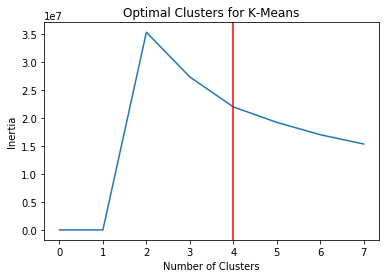

In [185]:
plt.plot(range(8), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Optimal Clusters for K-Means")
plt.axvline(x=4, color="red")

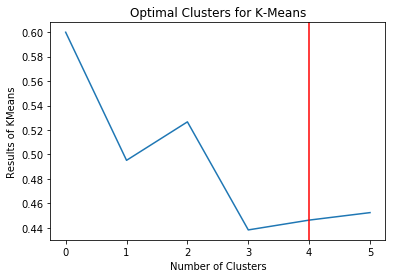

In [187]:
plt.plot(range(6), scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Results of KMeans")
plt.title("Optimal Clusters for K-Means")
plt.axvline(x=4, color="red")

In [188]:
kmeans = KMeans(n_clusters=4, random_state=101).fit(pca_df)
centers = kmeans.cluster_centers_
pred = kmeans.predict(pca_df)


In [190]:
anime_user_ratings_c["cluster"] = pred
anime_user_ratings_c.head()

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3


In [225]:
cluster_0 = anime_user_ratings_c[anime_user_ratings_c['cluster'] == 0].drop('cluster', axis=1).mean()
cluster_1 = anime_user_ratings_c[anime_user_ratings_c['cluster'] == 1].drop('cluster', axis=1).mean()
cluster_2 = anime_user_ratings_c[anime_user_ratings_c['cluster'] == 2].drop('cluster', axis=1).mean()
cluster_3 = anime_user_ratings_c[anime_user_ratings_c['cluster'] == 3].drop('cluster', axis=1).mean()

a2 = a2.loc[a2["episodes"] != "Unknown"]

In [277]:
def animeInfo(anime_lst):
    episode = []
    genre = []
    member = []
    ratings = []
    for anime in a2["name"]:
        if anime in anime_lst:
            #print(a2[a2["name"]==anime].episodes.values[0])

            episode.append(a2[a2["name"]==anime].episodes.values[0])
            member.append(a2[a2["name"]==anime].members.values[0])
            ratings.append(a2[a2["name"]==anime].rating.values[0])
            for g in a2[a2["name"]==anime].genre.values:
                #print(g)
                genre.append(g)

    return genre, episode, rating, member


In [278]:
def count_occurence(df, col, lst):
    keywords = dict()
    for l in lst:
        keywords[l] = 0
    
    for keyword in df[col]:
        keywords[keyword]+=1
    occurences.sort(key=lambda x: x[1], reverse=True)
    return occurences, keywords
        

In [280]:
lst = list(cluster_0.index)
cluster0_df = pd.DataFrame()
genre, episode, rating, member = animeInfo(lst)

cluster0_df["episodes"] = episode
cluster0_df["rating"] = rating
cluster0_df["members"] = member
cluster0_df["genre"] = genre


ValueError: Wrong number of items passed 3, placement implies 1

In [ ]:
#cluster0_df.append(pd.DataFrame(episode, columns = cluster0_df.columns))
cluster0_df.head()
#

In [275]:
episode

[array([1, 1, 1, 1]),
 array([1, 1, 1, 1]),
 array([1, 1, 1, 1]),
 array([1, 1, 1, 1]),
 array([64, 64, 64, 64, 64, 64, 64]),
 array([64, 64, 64, 64, 64, 64, 64]),
 array([64, 64, 64, 64, 64, 64, 64]),
 array([64, 64, 64, 64, 64, 64, 64]),
 array([64, 64, 64, 64, 64, 64, 64]),
 array([64, 64, 64, 64, 64, 64, 64]),
 array([64, 64, 64, 64, 64, 64, 64]),
 array([51, 51, 51, 51, 51, 51, 51]),
 array([51, 51, 51, 51, 51, 51, 51]),
 array([51, 51, 51, 51, 51, 51, 51]),
 array([51, 51, 51, 51, 51, 51, 51]),
 array([51, 51, 51, 51, 51, 51, 51]),
 array([51, 51, 51, 51, 51, 51, 51]),
 array([51, 51, 51, 51, 51, 51, 51]),
 array([24, 24]),
 array([24, 24]),
 array([51, 51, 51, 51, 51, 51, 51]),
 array([51, 51, 51, 51, 51, 51, 51]),
 array([51, 51, 51, 51, 51, 51, 51]),
 array([51, 51, 51, 51, 51, 51, 51]),
 array([51, 51, 51, 51, 51, 51, 51]),
 array([51, 51, 51, 51, 51, 51, 51]),
 array([51, 51, 51, 51, 51, 51, 51]),
 array([10, 10, 10, 10, 10]),
 array([10, 10, 10, 10, 10]),
 array([10, 10, 10